<a href="https://colab.research.google.com/github/fredymendezbustamante/MODELADO_Y_SIMULACION-/blob/master/Integraci%C3%B3n_De_Verlet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integración De Verlet.
# Fredy Alexander Mendez Bustamante. Cod:816539

# Modelado y Simulación.


Se utiliza con frecuencia para calcular trayectorias de partículas en simulaciones de dinámica molecular y videojuegos. El integrador de verlet ofrece una mayor estabilidad que el método Euler mucho más simple, así como otras propiedades que son importantes en los sistemas físicos, como la reversibilidad en el tiempo y las propiedades de conservación de áreas. Al principio, puede parecer natural calcular simplemente trayectorias utilizando la integración de Euler. Sin embargo, este tipo de integración adolece de muchos problemas, como se discutió en la integración de Euler. La estabilidad de la técnica depende en gran medida de una tasa de actualización uniforme o de la capacidad de identificar con precisión las posiciones en un pequeño delta de tiempo en el pasado. La integración de Verlet fue utilizada por Carl Størmer para calcular las trayectorias de partículas que se mueven en un campo magnético (de ahí que también se le llame método de Störmer) y fue popularizada en dinámica molecular por el físico francés Loup Verlet en 1967.



# Basic Verlet
La ecuación de movimiento de Newton para sistemas físicos conservadores es:
$$
M \ddot{\mathbf{x}}(t)=F(\mathbf{x}(t))=-\nabla V(\mathbf{x}(t))
$$
o individualmente
$$
m_{k} \ddot{\vec{x}}_{k}(t)=F_{k}(\mathbf{x}(t))=-\nabla_{\vec{x}_{k}} V(\mathbf{x}(t))
$$
dónde
"es la hora,
$\mathbf{x}(t)=\left(\vec{x}_{1}(t), \ldots, \vec{x}_{N}(t)\right)$ es el conjunto del vector de posición de $N$ objetos,
- $V$ es la función de potencial escalar,
- $F$ es el gradiente negativo del potencial que da el conjunto de fuerzas sobre las partículas,
- $M$ es la matriz de masa, típicamente diagonal con bloques con masa $m_{k}$ para cada partícula.
Esta configuración permite expresar problemas en dinámica molecular y N-cuerpos planetarios o estelares.
simulaciones, entre otros. Después de una transformación para llevar la masa al lado derecho y olvidar la estructura de múltiples partículas,
la ecuación se puede simplificar a
$$
\ddot{\vec{x}}(t)=A(\vec{x}(t))
$$
con alguna función de valor vectorial adecuada $A$ que representa la aceleración dependiente de la posición. Normalmente, una posición inicial$\vec{x}(0)=\vec{x}_{0}$ y una velocidad inicial $\vec{v}(0)=\dot{\vec{x}}(0)=\vec{v}_{0 \text { también se dan }}$
Para discretizar y resolver numéricamente este problema de valor inicial, se elige un paso de tiempo$\Delta t>0$ y se considera la secuencia de puntos de muestreo $t_{n}=n \Delta t$ La tarea es construir una secuencia de puntos $\vec{x}_{n}$ que sigan de cerca los puntos
En el orden uno, se puede considerar que la Integración de Verlet usa la aproximación de diferencia central a la segunda derivada:

$$
\frac{\Delta^{2} \vec{x}_{n}}{\Delta t^{2}}=\frac{\frac{\vec{x}_{n}+1-\vec{z}_{n}}{\Delta t}-\frac{\vec{x}_{n}-\vec{x}_{n-1}}{\Delta t}}{\Delta t}=\frac{\vec{x}_{n+1}-2 \vec{x}_{n}+\vec{x}_{n-1}}{\Delta t^{2}}=\vec{a}_{n}=A\left(\vec{x}_{n}\right)
$$
El algoritmo de Verlet $^{[2]}$ usa esta ecuación para obtener el siguiente vector de posición de los dos anteriores como
$$
\vec{x}_{n+1}=2 \vec{x}_{n}-\vec{x}_{n-1}+\vec{a}_{n} \Delta t^{2}, \quad \vec{a}_{n}=A\left(\vec{x}_{n}\right)
$$
sin usar la velocidad. La simetría de tiempo inherente al método reduce el nivel de errores introducidos en la integración al calcular la posición en el siguiente paso de tiempo. El error se cuantifica insertando los valores exactos
vector $\vec{x}(t \pm \Delta t)$ en diferentes direcciones de tiempo.

$$
\begin{array}{l}
\vec{x}(t+\Delta t)=\vec{x}(t)+\vec{v}(t) \Delta t+\frac{\vec{a}(t) \Delta t^{2}}{2}+\frac{\vec{b}(t) \Delta t^{3}}{6}+\mathcal{O}\left(\Delta t^{4}\right) \\
\vec{x}(t-\Delta t)=\vec{x}(t)-\vec{v}(t) \Delta t+\frac{\vec{a}(t) \Delta t^{2}}{2}-\frac{\vec{b}(t) \Delta t^{3}}{6}+\mathcal{O}\left(\Delta t^{4}\right)
\end{array}
$$
dónde $\vec{x}$ es la posición, $\vec{v}=\overrightarrow{\vec{x}}$ la velocidad, $\vec{a}=\overrightarrow{\vec{x}}$ la aceleración y $\vec{b}$ el tirón (tercera derivada de la posición con respecto al tiempo)$t$. Agregar estas dos expansiones da
$$
\vec{x}(t+\Delta t)=2 \vec{x}(t)-\vec{x}(t-\Delta t)+\vec{a}(t) \Delta t^{2}+\mathcal{O}\left(\Delta t^{4}\right)
$$
Podemos ver que los términos de primer y tercer de la expansión de Taylor se cancelan, lo que hace que el
El integrador Verlet es un orden más preciso que la integración mediante la expansión simple de Taylor.
Se debe tener cuidado con el hecho de que la aceleración aquí se calcula a partir de la solución exacta, $\vec{a}(t)=A(\vec{x}(t)),$mientras que en la iteración se calcula en el punto central de iteración, $\vec{a}_{n}=A\left(\vec{x}_{n}\right) . \ln$ Al calcular el error global, que es la distancia entre la solución exacta y la secuencia de aproximación, esos dos términos no se cancelan exactamente. Tenga en cuenta que al comienzo de la iteración Verlet en el paso $n=1,$ hora $t=t_{1}=\Delta t,$ informática $\vec{x}_{2},$ uno ya necesita el vector de posición $\vec{x}_{1 \text { at time }} t=t_{1}$. A primera vista, esto podría dar problemas, porque las condiciones iniciales se conocen solo en el momento inicial. Sin embargo, de estos la aceleracion $\vec{a}_{0}=A\left(\vec{x}_{0}\right)_{\text {Es conocida, y una adecuada}}$
La aproximación de la posición del paso por primera vez se puede obtener utilizando el polinomio de Taylor de grado dos:
$$
\vec{x}_{1}=\vec{x}_{0}+\vec{v}_{0} \Delta t+\frac{1}{2} \vec{a}_{0} \Delta t^{2} \approx \vec{x}(\Delta t)+\mathcal{O}\left(\Delta t^{3}\right)
$$
El error en el primer cálculo del paso de tiempo es entonces de orden $\mathcal{O}\left(\Delta t^{3}\right)$. Esto no se considera un problema porque en una simulación de más de una gran cantidad de pasos de tiempo, el error en el primer paso de tiempo es solo una pequeña cantidad insignificante del error total, que en el momento $t_{n}$ es del orden $\mathcal{O}\left(e^{L t_{n}} \Delta t^{2}\right),$ ambos para la distancia de los vectores de posición $\vec{x}_{n}$ a
error global de orden, el error inicial debe ser de al menos tercer orden.

Las velocidades no se dan explícitamente en la ecuación básica de Verlet, pero a menudo son necesarias para el cálculo de ciertas cantidades físicas como la energía cinética. Esto puede crear desafíos técnicos en las simulaciones de dinámica molecular, porque la energía cinética y las temperaturas instantáneas en el momento $ t $ no se pueden calcular para un sistema hasta que se conozcan las posiciones en el momento $ t + \Delta t $. Esta deficiencia puede tratarse utilizando Velocity Verlet
algoritmo, o estimando la velocidad usando los términos de posición y el teorema del valor medio:
$$
\vec{v}(t)=\frac{\vec{x}(t+\Delta t)-\vec{x}(t-\Delta t)}{2 \Delta t}+\mathcal{O}\left(\Delta t^{2}\right)
$$
Tenga en cuenta que este término de velocidad es un paso por detrás del término de posición, ya que es para la velocidad en el tiempo $t,$ no $t+\Delta t$, significa que $\vec{v}_{n}=\frac{\vec{x}_{n}+1-\vec{x}_{n-1}}{2 \wedge t}$ Es una orden de dos aproximaciones a $\vec{v}\left(t_{n}\right)$. Con el mismo argumento, pero reduciendo a la mitad el
hora de caminar, $\vec{v}_{n+1 / 2}=\frac{\vec{x}_{n}+1-\vec{x}_{n}}{\Delta t}$ Es una orden de dos aproximaciones a $\vec{v}\left(t_{n+1 / 2}\right),$ con $t_{n+1 / 2}=t_{n}+\frac{1}{2} \Delta t$
Se puede acortar el intervalo para aproximar la velocidad en el tiempo $t+\Delta t$ a costa de la precisión:
$$
\vec{v}(t+\Delta t)=\frac{\vec{x}(t+\Delta t)-\vec{x}(t)}{\Delta t}+\mathcal{O}(\Delta t)
$$



# Velocity Verlet

Un algoritmo relacionado y de uso más común es el algoritmo Velocity Verlet [3], similar al Leapfrog
método, excepto que la velocidad y la posición se calculan al mismo valor de la variable de tiempo
(Leapfrog no lo hace, como sugiere el nombre). Esto usa un enfoque similar pero incorpora explícitamente la velocidad, resolviendo el problema del primer paso de tiempo en el algoritmo Basic Verlet:
$$
\begin{aligned}
\vec{x}(t+\Delta t) &=\vec{x}(t)+\vec{v}(t) \Delta t+\frac{1}{2} \vec{a}(t) \Delta t^{2} \\
\vec{v}(t+\Delta t) &=\vec{v}(t)+\frac{\vec{a}(t)+\vec{a}(t+\Delta t)}{2} \Delta t
\end{aligned}
$$
Se puede demostrar que el error en Velocity Verlet es del mismo orden que en Basic Verlet. Tenga en cuenta que el
El algoritmo de velocidad no consume necesariamente más memoria, porque si no es necesario realizar un seguimiento de la velocidad en cada paso de tiempo durante la simulación. El esquema de implementación estándar de este algoritmo es:

 1.Calcular: $\vec{v}\left(t+\frac{1}{2} \Delta t\right)=\vec{v}(t)+\frac{1}{2} \vec{a}(t) \Delta t$
2. Calcular: $\vec{x}(t+\Delta t)=\vec{x}(t)+\vec{v}\left(t+\frac{1}{2} \Delta t\right) \Delta t$
3.Deriva $\vec{a}(t+\Delta$ tiom el potencial de interacción usando $\vec{x}(t+\Delta t)$
4. Calcular: $\vec{v}(t+\Delta t)=\vec{v}\left(t+\frac{1}{2} \Delta t\right)+\frac{1}{2} \vec{a}(t+\Delta t) \Delta t$

Eliminando la velocidad de medio paso, este algoritmo se puede acortar a
1. Calcular: $\vec{x}(t+\Delta t)=\vec{x}(t)+\vec{v}(t) \Delta t+\frac{1}{2} \vec{a}(t) \Delta t^{2}$
2. Deriva $\vec{a}(t+\Delta$ tiom el potencial de interacción usando $\vec{x}(t+\Delta t)$
3. Calcular: $\vec{v}(t+\Delta t)=\vec{v}(t)+\frac{1}{2}(\vec{a}(t)+\vec{a}(t+\Delta t)) \Delta t$.
Sin embargo, tenga en cuenta que este algoritmo supone que la aceleración$\vec{a}(t+\Delta t)_{\text {solo depende de la posición }} \vec{x}(t+\Delta t)$ y no depende de la velocidad $\vec{v}(t+\Delta t)$

Uno podría notar que los resultados a largo plazo de Velocity Verlet, y de manera similar de Leapfrog son un orden mejor
que el método de Euler semi-implícito. Los algoritmos son casi idénticos hasta un desplazamiento de la mitad de un paso de tiempo en
la velocidad. Esto se prueba fácilmente girando el bucle anterior para comenzar en el Paso 3 y luego observando que el
El término de aceleración en el Paso 1 podría eliminarse combinando los Pasos 2 y $4.$ La única diferencia es que el
La velocidad del punto medio en Velocity Verlet se considera la velocidad final en el método de Euler semi-implícito.

El error global de todos los métodos de Euler es de orden uno, mientras que el error global de este método es similar al
Método del punto medio, de orden dos. Además, si la aceleración es el resultado de las fuerzas en una forma conservadora
sistema mecánico o hamiltoniano, la energía de la aproximación esencialmente oscila alrededor de la constante
energía del sistema resuelto exactamente, con un error global ligado de nuevo de orden uno para Euler semi-explícito y
ordene dos para Verlet-leapfrog. Lo mismo ocurre con todas las demás cantidades conservadas del sistema, como lineal o
momento angular, que siempre se conservan o casi se conservan en un integrador simpléctico.



# Términos de error

El error local en la posición del integrador Verlet es $O\left(\Delta t^{4}\right)_{\text {como se describió anteriormente, y el error local en la velocidad es }}$ $O\left(\Delta t^{2}\right)$
El error global en la posición, por el contrario, es $O\left(\Delta t^{2}\right)$ y el error global en la velocidad es $O\left(\Delta t^{2}\right)$. Estos pueden
derivar observando lo siguiente:
$$
\operatorname{error}\left(x\left(t_{0}+\Delta t\right)\right)=O\left(\Delta t^{4}\right)
$$
y
$$
x\left(t_{0}+2 \Delta t\right)=2 x\left(t_{0}+\Delta t\right)-x\left(t_{0}\right)+\Delta t^{2} x^{\prime \prime}\left(t_{0}+\Delta t\right)+O\left(\Delta t^{4}\right)
$$
Por lo tanto:

$$
\operatorname{error}\left(x\left(t_{0}+2 \Delta t\right)\right)=2 \operatorname{crror}\left(x\left(t_{0}+\Delta t\right)\right)+O\left(\Delta t^{4}\right)=3 O\left(\Delta t^{4}\right)
$$
Similar:
$$
\begin{aligned}
\operatorname{error}\left(x\left(t_{0}+3 \Delta t\right)\right) &=6 O\left(\Delta t^{4}\right) \\
\operatorname{error}\left(x\left(t_{0}+4 \Delta t\right)\right) &=10 O\left(\Delta t^{4}\right) \\
\operatorname{error}\left(x\left(t_{0}+5 \Delta t\right)\right) &=15 O\left(\Delta t^{4}\right)
\end{aligned}
$$
Que se puede generalizar a (se puede demostrar por inducción, pero se da aquí sin prueba):
$$
\operatorname{error}\left(x\left(t_{0}+n \Delta t\right)\right)=\frac{n(n+1)}{2} O\left(\Delta t^{4}\right)
$$
Si consideramos el error global en la posición entre $x(t)$ y $x(t+T),$dónde$T=n \Delta t,$ está claro que:
$$
\operatorname{error}\left(x\left(t_{0}+T\right)\right)=\left(\frac{T^{2}}{2 \Delta t^{2}}+\frac{T}{2 \Delta t}\right) O\left(\Delta t^{4}\right)
$$
Y por lo tanto, el error global (acumulativo) sobre un intervalo de tiempo constante viene dado por:
$$
\operatorname{error}\left(x\left(t_{0}+T^{\prime}\right)\right)=O\left(\Delta t^{2}\right)
$$
Debido a que la velocidad se determina de manera no acumulativa a partir de las posiciones en el integrador Verlet, el error global en la velocidad también es $O\left(\Delta t^{2}\right)$

En las simulaciones de dinámica molecular, el error global suele ser mucho más importante que el error local, y por lo tanto, el integrador Verlet se conoce como integrador de segundo orden.

# Restricciones
Lo más notable que ahora es más fácil debido al uso de la integración de Verlet en lugar de Euleriano es que las restricciones entre partículas son muy fáciles de hacer. Una restricción es una conexión entre varios puntos que los limita de alguna manera, quizás colocándolos a una distancia específica o manteniéndolos separados, o haciendo
Asegúrese de que estén más cerca de una distancia específica. A menudo, los sistemas de física usan resortes entre los puntos para mantenerlos en los lugares donde se supone que deben estar. Sin embargo, utilizando resortes de rigidez infinita
entre dos puntos generalmente da los mejores resultados junto con el algoritmo verlet. Así es cómo:
$$
\begin{array}{l}
d_{1}=x_{2}^{(t)}-x_{1}^{(t)} \\
d_{2}=\left\|d_{1}\right\| \\
d_{3}=\frac{d_{2}-r}{d_{2}} \\
x_{1}^{(t+\Delta t)}=\tilde{x}_{1}^{(t+\Delta t)}+\frac{1}{2} d_{1} d_{3} \\
x_{2}^{(t+\Delta t)}=\tilde{x}_{2}^{(t+\Delta t)}-\frac{1}{2} d_{1} d_{3}
\end{array}
$$
Las variables $x_{i}^{(t)}$ son las posiciones de los puntos $i$ en el momento $t,$ las $\bar{x}_{i}^{(t)}$ son las no restringidas posiciones (es decir, las posiciones de los puntos antes de aplicar las restricciones) de los puntos $i$en el momento $t,$ las d variables son temporales (se agregan para la optimización ya que los resultados de sus expresiones se necesitan varias veces) y $r$ es la distancia que se supone que hay entre los dos puntos. Actualmente esto está en una dimensión, sin embargo, es fácil
ampliado a dos o tres. Simplemente encuentre el delta (primera ecuación) de cada dimensión y luego agregue los deltas al cuadrado al interior de la raíz cuadrada de la segunda ecuación (teorema de Pitágoras). Luego, duplica las dos últimas ecuaciones para el número de dimensiones que existen. Aquí es donde verlet simplifica las restricciones: en lugar de, por ejemplo, aplicar una velocidad a los puntos que eventualmente satisfarían la restricción, simplemente puede colocar el punto donde debería estar y el integrador verlet se encarga del resto.

Sin embargo, surgen problemas cuando varias restricciones colocan un vértice. Una forma de resolver esto es recorrer todos los vértices en una simulación de manera entrecruzada, de modo que en cada vértice la relajación de restricción del último vértice sea
giready utilizado para acelerar la difusión de la información. Utilice pasos de tiempo finos para la simulación, utilice un fracd
número de pasos de resolución de restricciones por paso de tiempo. o resolver restricciones hasta que se cumplan con una desviación específica.

Al aproximar las restricciones localmente al primer orden, esto es lo mismo que el método de Gauss-Seidel.
Para matrices pequeñas, se sabe que la descomposición LU es más rápida. Los sistemas grandes se pueden dividir en grupos
(por ejemplo: cada ragdoll = cluster). Dentro de los clústeres se utiliza el método LU, entre los clústeres se utiliza el método Gauss-
Se utiliza el método Seidel. El código de la matriz se puede reutilizar: la dependencia de las fuerzas en las posiciones
puede aproximarse localmente al primer orden, y la integración de verlet puede hacerse más implícita.

Para grandes matrices, solucionadores sofisticados (busque especialmente "Los tamaños de estas pequeñas matrices densas pueden ser
ajustado para coincidir con el punto óptimo "en [5]) para que existan matrices dispersas, cualquier integración Verlet hecha por uno mismo tiene que competir
con estos. El uso de (grupos de) matrices no es generalmente más preciso o estable, pero aborda la
problema específico, que una fuerza en un vértice de una hoja de tela debe alcanzar cualquier otro vértice en un número bajo de
pasos de tiempo incluso si se usa una rejilla fina para la tela [\ theta] (el enlace necesita refinamiento) y no forma una onda de sonido.
Otra forma de resolver las restricciones holonómicas es utilizar algoritmos de restricción.



# Reacciones de colisión

Una forma de reaccionar ante las colisiones es utilizar un sistema basado en penalizaciones que básicamente aplica una fuerza fija a un punto al hacer contacto. El problema con esto es que es muy difícil elegir la fuerza impartida. Use también
una fuerza fuerte y los objetos se volverán inestables, demasiado débiles y los objetos se penetrarán entre sí.
Otra forma es usar reacciones de colisión de proyección que toman el punto ofensivo e intenta moverse
Es la distancia más corta posible para moverlo fuera del otro objeto.

La integración de Verlet manejaría automáticamente la velocidad impartida a través de la colisión en el último caso, sin embargo, tenga en cuenta que esto no está garantizado para hacerlo de una manera que sea consistente con la física de colisión (es decir,
no se garantiza que los cambios en el impulso sean realistas). En lugar de cambiar implícitamente el término de velocidad,
necesitaría controlar explícitamente las velocidades finales de los objetos que chocan (cambiando el registro
posición del paso de tiempo anterior).

Los dos métodos más simples para decidir sobre una nueva velocidad son colisiones exactamente elásticas y colisiones inelásticas.
Una estrategia un poco más complicada que ofrece más control implicaría utilizar el ooeficiente de la restitución.

# Aplicaciones
Las ecuaciones de Verlet también se pueden modificar para crear un efecto de amortiguación muy simple (por ejemplo, para emular
fricción de aire en juegos de computadora):
$$
x(t+\Delta t)=(2-f) x(t)-(1-f) x(t-\Delta t)+a(t) \Delta t^{2}
$$
Donde f es un número que representa la fracción de la velocidad por actualización que se pierde por fricción (0-1).


# Literatura
Literature

[1]	Verlet, Loup (1967). "Computer "Experiments" on Classical Fluids. I. Thermodynamical Properties of Lennard−Jones Molecules" (http:/ / link. aps. org/ doi/ 10. 1103/ PhysRev. 159. 98). Physical Review 159: 98–103. doi:10.1103/PhysRev.159.98. .

[2]	webpage (http:/ / www. fisica. uniud. it/ ~ercolessi/ md/ md/ node21. html) with a description of the method

[3]	http:/ / www. fisica. uniud. it/ ~ercolessi/ md/ md/ node21. html

[4]	Hairer, Ernst; Lubich, Christian; Wanner, Gerhard (2003). "Geometric numerical integration illustrated by the Störmer/Verlet method" (http:/ / citeseerx. ist. psu. edu/ viewdoc/ summary?doi=10. 1. 1. 7. 7106). Acta Numerica 12: 399–450. doi:10.1017/S0962492902000144. .

[5]	http:/ / crd. lbl. gov/ ~xiaoye/ SuperLU/ superlu_ug. pdf

[6]	http:/ / www. cs. cmu. edu/ ~baraff/ papers/ index. html


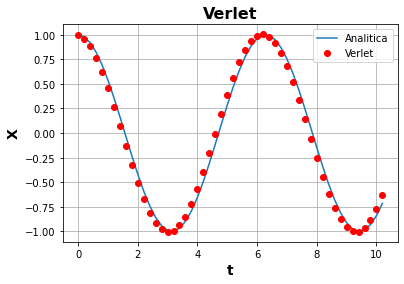

In [11]:
from numpy import cos, array

#%% Constantes

k  = 1     # Constante de resorte
m  = 1     # Masa
dt = 0.2   # Exactitud
tm = 10    # tiempo de simulacion

#%% condiciones iniciales 

x = [1]    # posicion unicial
v = [0]    # velocidad inicial 

# Tiempo
t = [0]

#%% algoritmo de Verlet 

i = 0

while t[-1] <= tm:
    
    # Aceleracion
    a = -(k/m)* (x[i])
    
     
    if i == 0:
        
        # Método de Euler 
        
        # Velocidad
        v_next = v[i] + a* dt
        
        # Posicion
        x_next = x[i] + v_next* dt
        
    else:
        
        # Posicion
        x_next = 2* x[i] - x[i-1] + a* dt**2
        
    # posicion actual 
    x.append(x_next)
    
    # tiempo actual
    t.append(t[i] + dt)
        
    # Actualización de bucle
    i = i + 1
    
#%% solucion analitica
    
omg = (k/ m)**0.5
xa  = x[0]* cos(omg* array(t))

#%% Plot
import matplotlib.pyplot as plt

plt.plot(t, xa, label = 'Analitica')
plt.plot(t, x, 'ro', label = 'Verlet')
plt.title('Verlet', fontweight = 'bold', fontsize = 16)
plt.xlabel('t', fontweight = 'bold', fontsize = 14)
plt.ylabel('X', fontweight = 'bold', fontsize = 14)
plt.grid(True)
plt.legend()
plt.show()